In [3]:
import pandas as pd
index_df = pd.read_csv('/home/workspace/data/GLDv2/index/index.csv')
index_landmark_df = pd.read_csv('/home/workspace/data/GLDv2/index/index_image_to_landmark.csv')
index_category_df = pd.read_csv('/home/workspace/data/GLDv2/index/index_label_to_category.csv')
index_hierarchical_df = pd.read_csv('/home/workspace/data/GLDv2/index/index_label_to_hierarchical.csv')

In [43]:
# GLDv2 데이터셋의 인덱스 이미지는 761,757개 존재
index_df.head()

,id
0,fdf40612109ad174
1,5a6cc67c893daea6
2,87b88acb68cdc1f1
3,c4ac217ce087b251
4,05f269bf32be9d3e


# index_image_to_landmark.csv 파일

In [7]:
index_landmark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761757 entries, 0 to 761756
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           761757 non-null  object
 1   landmark_id  761757 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ MB


In [8]:
index_landmark_df.head()

,id,landmark_id
0,fdf40612109ad174,32888
1,5a6cc67c893daea6,552
2,87b88acb68cdc1f1,13626
3,c4ac217ce087b251,8699
4,05f269bf32be9d3e,30838


## landmark별 이미지 분포도 확인

In [ ]:
# index 데이터의 랜드마크 종류는 101,302개
len(index_landmark_df['landmark_id'].unique())

101302

In [46]:
index_landmark_df.groupby('landmark_id')['id'].count().sort_values(ascending=False)

landmark_id
78775     8695
93036     3779
4782      3705
91437     2986
97365     2696
          ... 
101229       1
101230       1
101236       1
101237       1
101241       1
Name: id, Length: 101302, dtype: int64

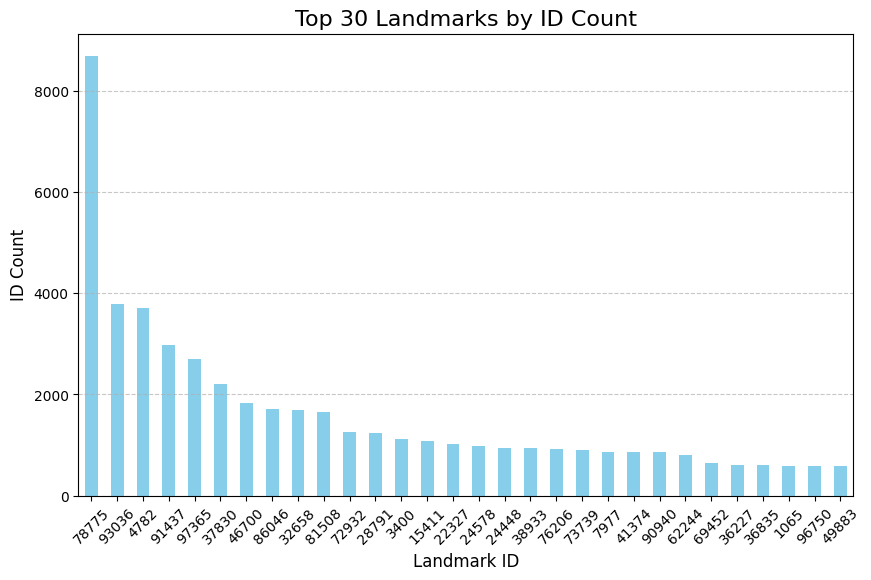

In [38]:
import matplotlib.pyplot as plt

# landmark_id별 id 카운트 계산 및 정렬
landmark_counts = index_landmark_df.groupby('landmark_id')['id'].count().sort_values(ascending=False)

# 상위 30개의 데이터 선택
top_10_landmarks = landmark_counts.head(30)

# 막대그래프 생성
plt.figure(figsize=(10, 6))
top_10_landmarks.plot(kind='bar', color='skyblue')
plt.title('Top 30 Landmarks by ID Count', fontsize=16)
plt.xlabel('Landmark ID', fontsize=12)
plt.ylabel('ID Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### index_label_to_category.csv와 index_label_to_hierarchical.csv 파일은 불필요

In [45]:
index_category_df.head()

,landmark_id,category
0,0,http://commons.wikimedia.org/wiki/Category:Sea...
1,1,http://commons.wikimedia.org/wiki/Category:Fra...
2,2,http://commons.wikimedia.org/wiki/Category:Rin...
3,3,http://commons.wikimedia.org/wiki/Category:Tak...
4,4,http://commons.wikimedia.org/wiki/Category:Iep...


In [44]:
index_hierarchical_df.head()

,landmark_id,category,supercategory,hierarchical_label,natural_or_human_made
0,0,http://commons.wikimedia.org/wiki/Category:Sea...,protected area,parks,natural
1,2,http://commons.wikimedia.org/wiki/Category:Rin...,lake,lake,natural
2,3,http://commons.wikimedia.org/wiki/Category:Tak...,Shinto shrine,shinto shrine,human-made
3,5,http://commons.wikimedia.org/wiki/Category:Puf...,train service,NaN,NaN
4,8,http://commons.wikimedia.org/wiki/Category:Pet...,cemetery,cemetery,human-made
